## Overview

> Has the network latency gone up since we switched ISPs?

- $H_0$: the network latency is the same since the ISP switch.
- $H_a$: the new ISP has higher latency
- True Positive: We reject $H_0$, our latency is ~ 300ms on average with the new ISP, it was ~50ms
- False Positive: We reject $H_0$, our data says the latency is higher; maybe our data is biased, we took recordings between 6pm and 8pm when everyone is streaming media
- False Negative: We fail to reject $H_0$: maybe we took recordings between 6am and 7am when no one is on the network
- True Negative: Our data says there isn't much difference in latency and we fail to reject $H_0$

> Is the website redesign any good?

- $H_0$: the number of click throughs since the site redesign hasn't changed
- $H_a$: there are more click throughs since the site redesign
- TP: reject $H_0$, we conclude that the redesign helped, and it really did
- FP: reject $H_0$, we conclude that the redesign helped, but really it didn't; maybe we only showed the new website to previously engaged customers
- FN: fail to reject $H_0$, we conclude the redesign did not help, but really it did; maybe we only showed the new website to people who provided negative feedback
- TN: fail to reject $H_0$, we conclude the redesign did not help, and it really didn't

> Is our TV ad driving more sales?

Scenario: We're frito-lay advertising cool ranch doritos.

- $H_0$: Cool ranch doritos don't sell any better when we're running an advertisement
- $H_a$: Sales for cool ranch doritos increase when we're running an ad
- FP: reject $H_0$; we conclude that the advertisement helped sales, but really it didn't
- FN: fail to reject $H_0$; we conclude that the ad did not help, but really it did
- TP: reject $H_0$; we conclude that the ad helped, and it did
- TN: fail to reject $H_0$: we conclude the ad did not boost sales, and really it didn't

Scenario: suppose we have a production issue while the ad is running -- there's not enough product to sell, sales are low

- FN: conclude that the ad didn't help, but really it did, we just didn't have enough inventory

Scenario: suppose there's a global pandemic, and everyone is staying inside while the ad is running. There's increased sales of cool ranch doritos.

- FP: conclude that the ad helped, when really it didn't, the increased sales are due to the global pandemic

## T-Test

We skipped the first problem here, but for demonstration:

> Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- $H_0$: the average home sale time is the same for office 1 and office 2
- $H_a$: the average home sale time is smaller for office 1 than office 2

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import pydataset
import env

In [2]:
n1 = 40
xbar1 = 90
s1 = 15

n2 = 50
xbar2 = 100
s2 = 20

t, p = stats.ttest_ind_from_stats(xbar1, s1, n1, xbar2, s2, n2)

one_tailed_p = p / 2
one_tailed_p

0.005104926224619695

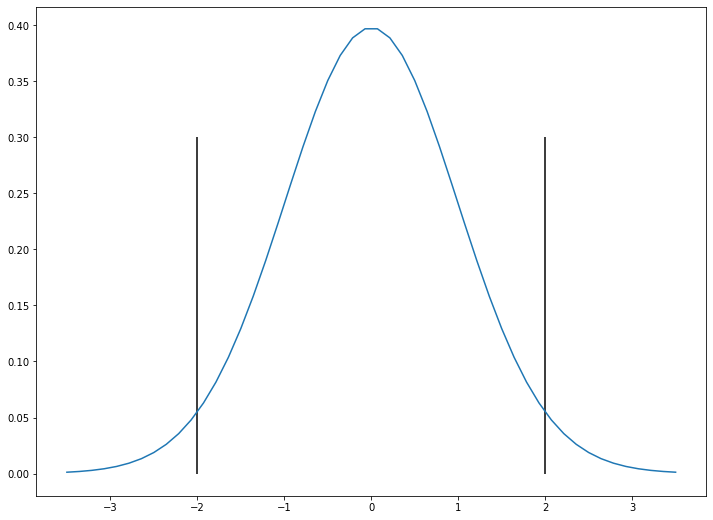

In [3]:
degf = n1 + n2 - 2

dist = stats.t(degf)

x = np.linspace(-3.5, 3.5)
y = dist.pdf(x)

plt.figure(figsize=(12, 9))
plt.plot(x, y)
plt.vlines([-2, 2], 0, .3)

In [4]:
print(f'''
t = {t:.04f}
p = {p:.04f}

Because p ({p:.4f}) < alpha (.05), we reject the null hypothesis that
the average home sale time is the same for office 1 and office 2.
'''.strip())

t = -2.6252
p = 0.0102

Because p (0.0102) < alpha (.05), we reject the null hypothesis that
the average home sale time is the same for office 1 and office 2.


In [5]:
mpg = pydataset.data('mpg')

> Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- $H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999
- $H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

In [6]:
x1 = mpg[mpg.year == 1999].hwy
x2 = mpg[mpg.year == 2008].hwy

t, p = stats.ttest_ind(x1, x2)
p

0.9738110448529322

In [7]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null hypothesis that there
is no difference in fuel-efficency in cars from 2008 and 1999.
''')


Because p (0.974) > alpha (.05), we fail to reject the null hypothesis that there
is no difference in fuel-efficency in cars from 2008 and 1999.



> Are compact cars more fuel-efficient than the average car?

- $H_0$: there is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency
- $H_a$: there is a difference in fuel-efficiency between compact cars and the population average fuel-efficiency

In [8]:
x = mpg[mpg['class'] == 'compact'].hwy
mu = mpg.hwy.mean()

t, p = stats.ttest_1samp(x, mu)
print('t=', t)
print('p=', p)

t= 8.806470666529446
p= 1.9716962312411042e-11


In [9]:
print(f'''
Because p ({p:.12f}) < alpha (.05), we reject the null hypothesis that there is
no difference in fuel-efficiency between compact cars and the overall average.
''')


Because p (0.000000000020) < alpha (.05), we reject the null hypothesis that there is
no difference in fuel-efficiency between compact cars and the overall average.



In [10]:
print(f'''
Avg mileage for compact cars: {x.mean():.2f}
Overall average mileage:      {mu:.2f}
''')


Avg mileage for compact cars: 28.30
Overall average mileage:      23.44



> Do manual cars get better gas milage than automatic cars?

- $H_0$: there is no difference in gas mileage between manual and automatic cars.
- $H_a$: there is a difference in gas mileage between manual and automatic cars.

In [11]:
is_automatic_transmission = mpg.trans.str.startswith('auto')

x1 = mpg[is_automatic_transmission].hwy
x2 = mpg[~ is_automatic_transmission].hwy

t, p = stats.ttest_ind(x2, x1)
print('t=', t)
print('p=', p)

t= 4.368349972819688
p= 1.888044765552951e-05


In [12]:
print(f'''
Becuase p ({p:.5f}) < alpha (.05), we reject the null hypothesis that there
is no difference in gas mileage between manual and automatic cars.
''')


Becuase p (0.00002) < alpha (.05), we reject the null hypothesis that there
is no difference in gas mileage between manual and automatic cars.



## Correlation

In [13]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
query = '''
SELECT *
FROM customers
JOIN internet_service_types USING(internet_service_type_id)
'''
telco = pd.read_sql(query, url)
telco = telco[telco.total_charges != ""]
telco = telco[telco.total_charges != " "]
telco.total_charges = telco.total_charges.astype(float)

In [14]:
alpha = .05
r, p = stats.pearsonr(telco.tenure, telco.monthly_charges)
print(f'''
r = {r:.4f}
p = {p:.4f}
'''.strip())
if p < alpha:
    print("Reject our null hypothesis")
else:
    print("Fail to reject our null hypothesis")

r = 0.2469
p = 0.0000
Reject our null hypothesis


In [15]:
# pearson's R of tenure and total charges
alpha = .05
r, p = stats.pearsonr(telco.tenure, telco.total_charges)
if p < alpha:
    print("Reject the null")
    print("There is a linear relationship")
else: 
    print("Fail to reject the null")
r, p

Reject the null
There is a linear relationship


(0.8258804609332021, 0.0)

Controlling for internet service

In [16]:
telco.internet_service_type.value_counts()

Fiber optic    3096
DSL            2416
None           1520
Name: internet_service_type, dtype: int64

In [17]:
telco_has_internet = telco[telco.internet_service_type != 'None']
telco_no_internet = telco[telco.internet_service_type == 'None']

In [18]:
alpha = .05
r, p = stats.pearsonr(telco_has_internet.tenure, telco_has_internet.monthly_charges)
print(f'''
r = {r:.4f}
p = {p:.4f}
'''.strip())
if p < alpha:
    print("Reject our null hypothesis")
else:
    print("Fail to reject our null hypothesis")

r = 0.3720
p = 0.0000
Reject our null hypothesis


In [19]:
alpha = .05
r, p = stats.pearsonr(telco_no_internet.tenure, telco_no_internet.monthly_charges)
print(f'''
r = {r:.4f}
p = {p:.4f}
'''.strip())
if p < alpha:
    print("Reject our null hypothesis")
else:
    print("Fail to reject our null hypothesis")

r = 0.3462
p = 0.0000
Reject our null hypothesis


In [20]:
# pearson's R of tenure and total charges
alpha = .05
r, p = stats.pearsonr(telco_has_internet.tenure, telco_has_internet.total_charges)
if p < alpha:
    print("Reject the null")
    print("There is a linear relationship")
else: 
    print("Fail to reject the null")
r, p

Reject the null
There is a linear relationship


(0.9319346187418098, 0.0)

In [21]:
# pearson's R of tenure and total charges
alpha = .05
r, p = stats.pearsonr(telco_no_internet.tenure, telco_no_internet.total_charges)
if p < alpha:
    print("Reject the null")
    print("There is a linear relationship")
else: 
    print("Fail to reject the null")
r, p

Reject the null
There is a linear relationship


(0.9814648859044287, 0.0)

Correlations in the employees database.

- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [22]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT salary, DATEDIFF(curdate(), hire_date) as 'days'
FROM salaries
JOIN employees USING(emp_no)
WHERE to_date > now()
'''
df = pd.read_sql(query, url)
df.head()

,salary,days
0,88958,12493
1,72527,12710
2,43311,12430
3,74057,12335
4,94692,11319


- $H_0$: There is no linear relationship between salary and employee tenure
- $H_a$: there is a linear relationship

In [23]:
alpha = .05

r, p = stats.pearsonr(df.salary, df.days)
print("R correlation coefficient", r)
print("P value, which is probability of seeing the data given the null hypothes is true", p)

if p < alpha:
    print("Reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis")

R correlation coefficient 0.3064625613186078
P value, which is probability of seeing the data given the null hypothes is true 0.0
Reject the null hypothesis.


> Is there a relationship between how long an employee has been with the company and the number of titles they have had?

- $H_0$ There is no linear relationship between # of titles and employee tenure
- $H_a$ There is, in fact, a linear relationship between # of titles and tenure

In [24]:
query = """
select emp_no, 
    datediff(curdate(), hire_date) as tenure, 
    count(*) as n_titles
from employees
join titles using(emp_no)
group by emp_no
"""
df = pd.read_sql(query, url)
df.head()

,emp_no,tenure,n_titles
0,10001,12493,1
1,10002,12710,1
2,10003,12430,1
3,10004,12335,2
4,10005,11319,2


In [25]:
alpha = 0.05
r, p = stats.pearsonr(df.tenure, df.n_titles)
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis.")

print("R is", r)
print("p-value is", p)
print("alpha is", alpha)

We reject the null hypothesis
R is 0.2665989299136619
p-value is 0.0
alpha is 0.05


## $\chi^2$

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

|                       | codeup student | not codeup student |
|-----------------------|----------------|--------------------|
| uses a macbook        | 49             | 20                 |
| doesn't use a macbook | 1              | 30                 | 


- $H_0$: Using a macbook and being a codeup student are independent of eachother
- $H_a$: Using a macook and being a codeup student are dependent on eachother

In [26]:
df = pd.DataFrame([[49, 20], [1, 30]])
df.columns = ["codeup student", "not codeup"]
df.index = ["macbook", "not macbook"]
df

,codeup student,not codeup
macbook,49,20
not macbook,1,30


In [27]:
chi2, p, degf, expected = stats.chi2_contingency(df)

# probability of observing the results given the null hypothesis is true
p

1.4116760526193828e-09

In [28]:
null_hypothesis = "having a macbook and being a codeup student are independent."
alternative_hypothesis = "macbook ownership and being a codeup student are dependent. There is a relationship"

alpha = .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We can say that we have confidence that", alternative_hypothesis)
else:
    print("We fail to reject the null")

We reject the null hypothesis
We can say that we have confidence that macbook ownership and being a codeup student are dependent. There is a relationship


> Choose another 2 categorical variables from the mpg dataset and perform a $\chi^2$ contingency test with them. 
> Be sure to state your null and alternative hypotheses.

In [29]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


- $H_0$: The number of cylinders a vehicle has is independent from whether it is front, rear, or all-wheel drive.
- $H_0$: The number of cylinders and drive type are dependent

In [30]:
observed = pd.crosstab(mpg.drv, mpg.cyl)
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

6.143348809350951e-19

Conclusion: reject $H_0$

> Use the data from the employees database to answer these questions:
> 
> - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
> - Is an employee's gender independent of whether or not they are or have been a manager?

- $H_0$: Sales or marketing employees are independent of gender
- $H_a$: Whether or not someone works in sales or marketing is dependent on gender

In [31]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
sql = """
SELECT dept_name, gender FROM employees
JOIN dept_emp USING(emp_no)
JOIN departments USING(dept_no)
WHERE to_date > now()
"""
df = pd.read_sql(sql, url)
df.head()

,dept_name,gender
0,Customer Service,M
1,Customer Service,F
2,Customer Service,M
3,Customer Service,F
4,Customer Service,F


In [32]:
df = df[df.dept_name.isin(['Marketing', 'Sales'])]

In [33]:
observed = pd.crosstab(df.dept_name, df.gender)
observed

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [34]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.5691938610810126

In [35]:
alpha = 0.05
null_h = "employee gender is independent of whether someone works in marketing or sales"
alternative_h = "Employee Gender and Working in Marketing or Sales is dependent"

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
    print("We fail to reject the hypothesis that", null_h)

Fail to reject the null
We fail to reject the hypothesis that employee gender is independent of whether someone works in marketing or sales


> Is an employee's gender independent of whether or not they are or have been a manager?

- $H_0$: Gender is independent of whether or not someone is or has been a manager
- $H_a$: Gender and whether or not someone has been or is a manager is dependent

In [36]:
sql = """
SELECT
    gender,
    emp_no IN (SELECT emp_no FROM dept_manager) AS is_manager
FROM employees
"""
df = pd.read_sql(sql, url)
df.head()

,gender,is_manager
0,M,0
1,F,0
2,M,0
3,M,0
4,M,0


In [37]:
observed = pd.crosstab(df.is_manager, df.gender)

chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
null_h = "gender and whether or not someone has been a manager is independent"
alternative_h = "gender and being a manager are dependent on eachother"
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
